## Frame the Problem and Big Picture

**Client Background:**
- Our client, FinSight Analytics, is a financial risk assessment consultancy that provides services to major investment firms, banks, and private equity companies across North America. They've approached Team Gort to develop a more effective bankruptcy prediction model that their analysts can use to assess investment and lending risks.

**1. Define the objective in business terms:**
- The objective is to develop a bankruptcy prediction model that reduces financial risk exposure for FinSight Analytics' clients by identifying companies at high risk of bankruptcy before it occurs. This will enable clients to protect their investments, adjust lending terms, or avoid high-risk engagements altogether, ultimately preventing significant financial losses.

**2. How will your solution be used?**
- This model will be used by financial institutions (banks, investment firms, and creditors) to assess the bankruptcy risk of companies they're considering investing in or extending credit to. It will serve as an early warning system, allowing these stakeholders to make more informed decisions, adjust lending terms based on risk profiles, implement early intervention strategies, and optimize their portfolio management.

**3. What are the current solutions/workarounds (if any)?**
- Currently, financial institutions rely on traditional credit scoring models and manual analysis by financial analysts. These approaches often fail to detect early warning signs of bankruptcy and tend to over-rely on limited metrics like payment history and debt ratios while overlooking other critical financial indicators.

**4. How should you frame this problem?**
- This is a supervised binary classification problem since we are trying to predict whether a company will go bankrupt (1) or not (0) based on historical financial data. This would be a batch learning solution that gets periodically updated as new financial data becomes available, though predictions would be generated whenever a new company needs to be evaluated.

**5. How should performance be measured? Is the performance measure aligned with the business objective?**
- Our objective is to be able to predict at least 75% of the companies that will go bankrupt while maintaining a false positive rate below 15%. This aligns with our business objective since missing a bankruptcy prediction can result in significant financial losses, while incorrectly flagging healthy companies can lead to missed business opportunities.

- **False negatives (missing bankruptcies)**: Each missed bankruptcy prediction could cost clients millions in unrecoverable investments.

**6. What would be the minimum performance needed to reach the business objective?**
- The minimum performance needed would be the ability to correctly identify at least 75% of companies that will go bankrupt, with a false positive rate below 15%, and provide predictions at least 12 months before bankruptcy occurs.

**7. What are comparable problems? Can you reuse experience or tools?**
- This problem is comparable to other financial risk assessment problems such as credit default prediction and loan delinquency prediction. We can leverage our experience with classification algorithms like Random Forest, Gradient Boosting, and logistic regression, which have proven effective in similar financial prediction tasks. We can also use techniques from previous projects dealing with imbalanced datasets. Other past machine learning problems we have tackled such as the airline project can contribute to our knowledge of how to navigate a classification problem.

**8. Is human expertise available?**
- No we currently don't have any human expertise at the moment to assist us with this problem but we have been looking for online at people who have worked in this field to seek guidance from things they have shared publicly or if we can eventually get in contact.

**9. How would you solve the problem manually?**
- To solve this problem manually, we would need to analyze the historical financial data of companies that went bankrupt and those that remained solvent. We would look for patterns in financial ratios, identify negative trends in profitability and liquidity, examine cash flow patterns, assess debt structure, and combine these factors to make a risk assessment. We would also need to consider industry-specific benchmarks since financial ratios can vary significantly across different sectors.

**10. List the assumptions you (or others) have made so far. Verify assumptions if possible.**
- We have made the assumption that financial ratios and indicators from company reports are strong predictors of future bankruptcy. We also assume that the relationship between these indicators and bankruptcy risk remains relatively stable over time. Another assumption is that the provided dataset contains sufficient examples of both bankrupt and non-bankrupt companies to train an effective model. We will need to verify these assumptions during our exploratory data analysis phase.


## Get the Data

**1. List the data you need and how much you need**
- Company Bankruptcy Data 

**2. Find and document where you can get that data**
- The data is freely available on Kaggle: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download

**3. Get access authorizations**
- You must make a kaggle account to be able to download the data

**4. Create a workspace (with enough storage space)**
- This notebook

**5. Get the data**
- Download from the link

**6. Convert the data to a format you can easily manipulate (without changing the data itself)**
- The data is all in a csv file that is easily manipulatable 

**7. Ensure sensitive information is deleted or protected (e.g. anonymized)**
- There is no sensitive data that is stored inside the csv

**8. Check the size and type of data (time series, geographical, ...)**
- Need to document

**9. Sample a test set, put it aside, and never look at it (no data snooping!)**
- Done

In [104]:
# Imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [105]:
data = pd.read_csv('Bankruptcy.csv')


In [106]:
# A quick look at the data showing column names and data types and number of non-null values
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [107]:
# A brief look at the data
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [108]:
# Shows the number of columns and rows in the data
data.shape

(6819, 96)

In [109]:
# Looking at the proportions of bankrupt and non-bankrupt companies
# 0 = non-bankrupt, 1 = bankrupt
data["Bankrupt?"].value_counts() / len(data)

Bankrupt?
0    0.967737
1    0.032263
Name: count, dtype: float64

Text(0, 0.5, 'Frequancy')

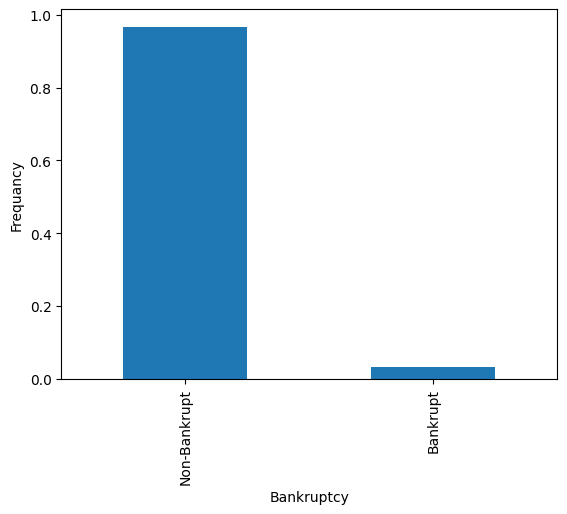

In [110]:
# Visualizing the proportions of bankrupt and non-bankrupt companies
data['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankruptcy")
plt.xticks([0, 1], ['Non-Bankrupt', 'Bankrupt'])
plt.ylabel("Frequancy")

In [111]:
# Checks for missing values in the dataset
(data.isna().sum() > 0).sum()

np.int64(0)

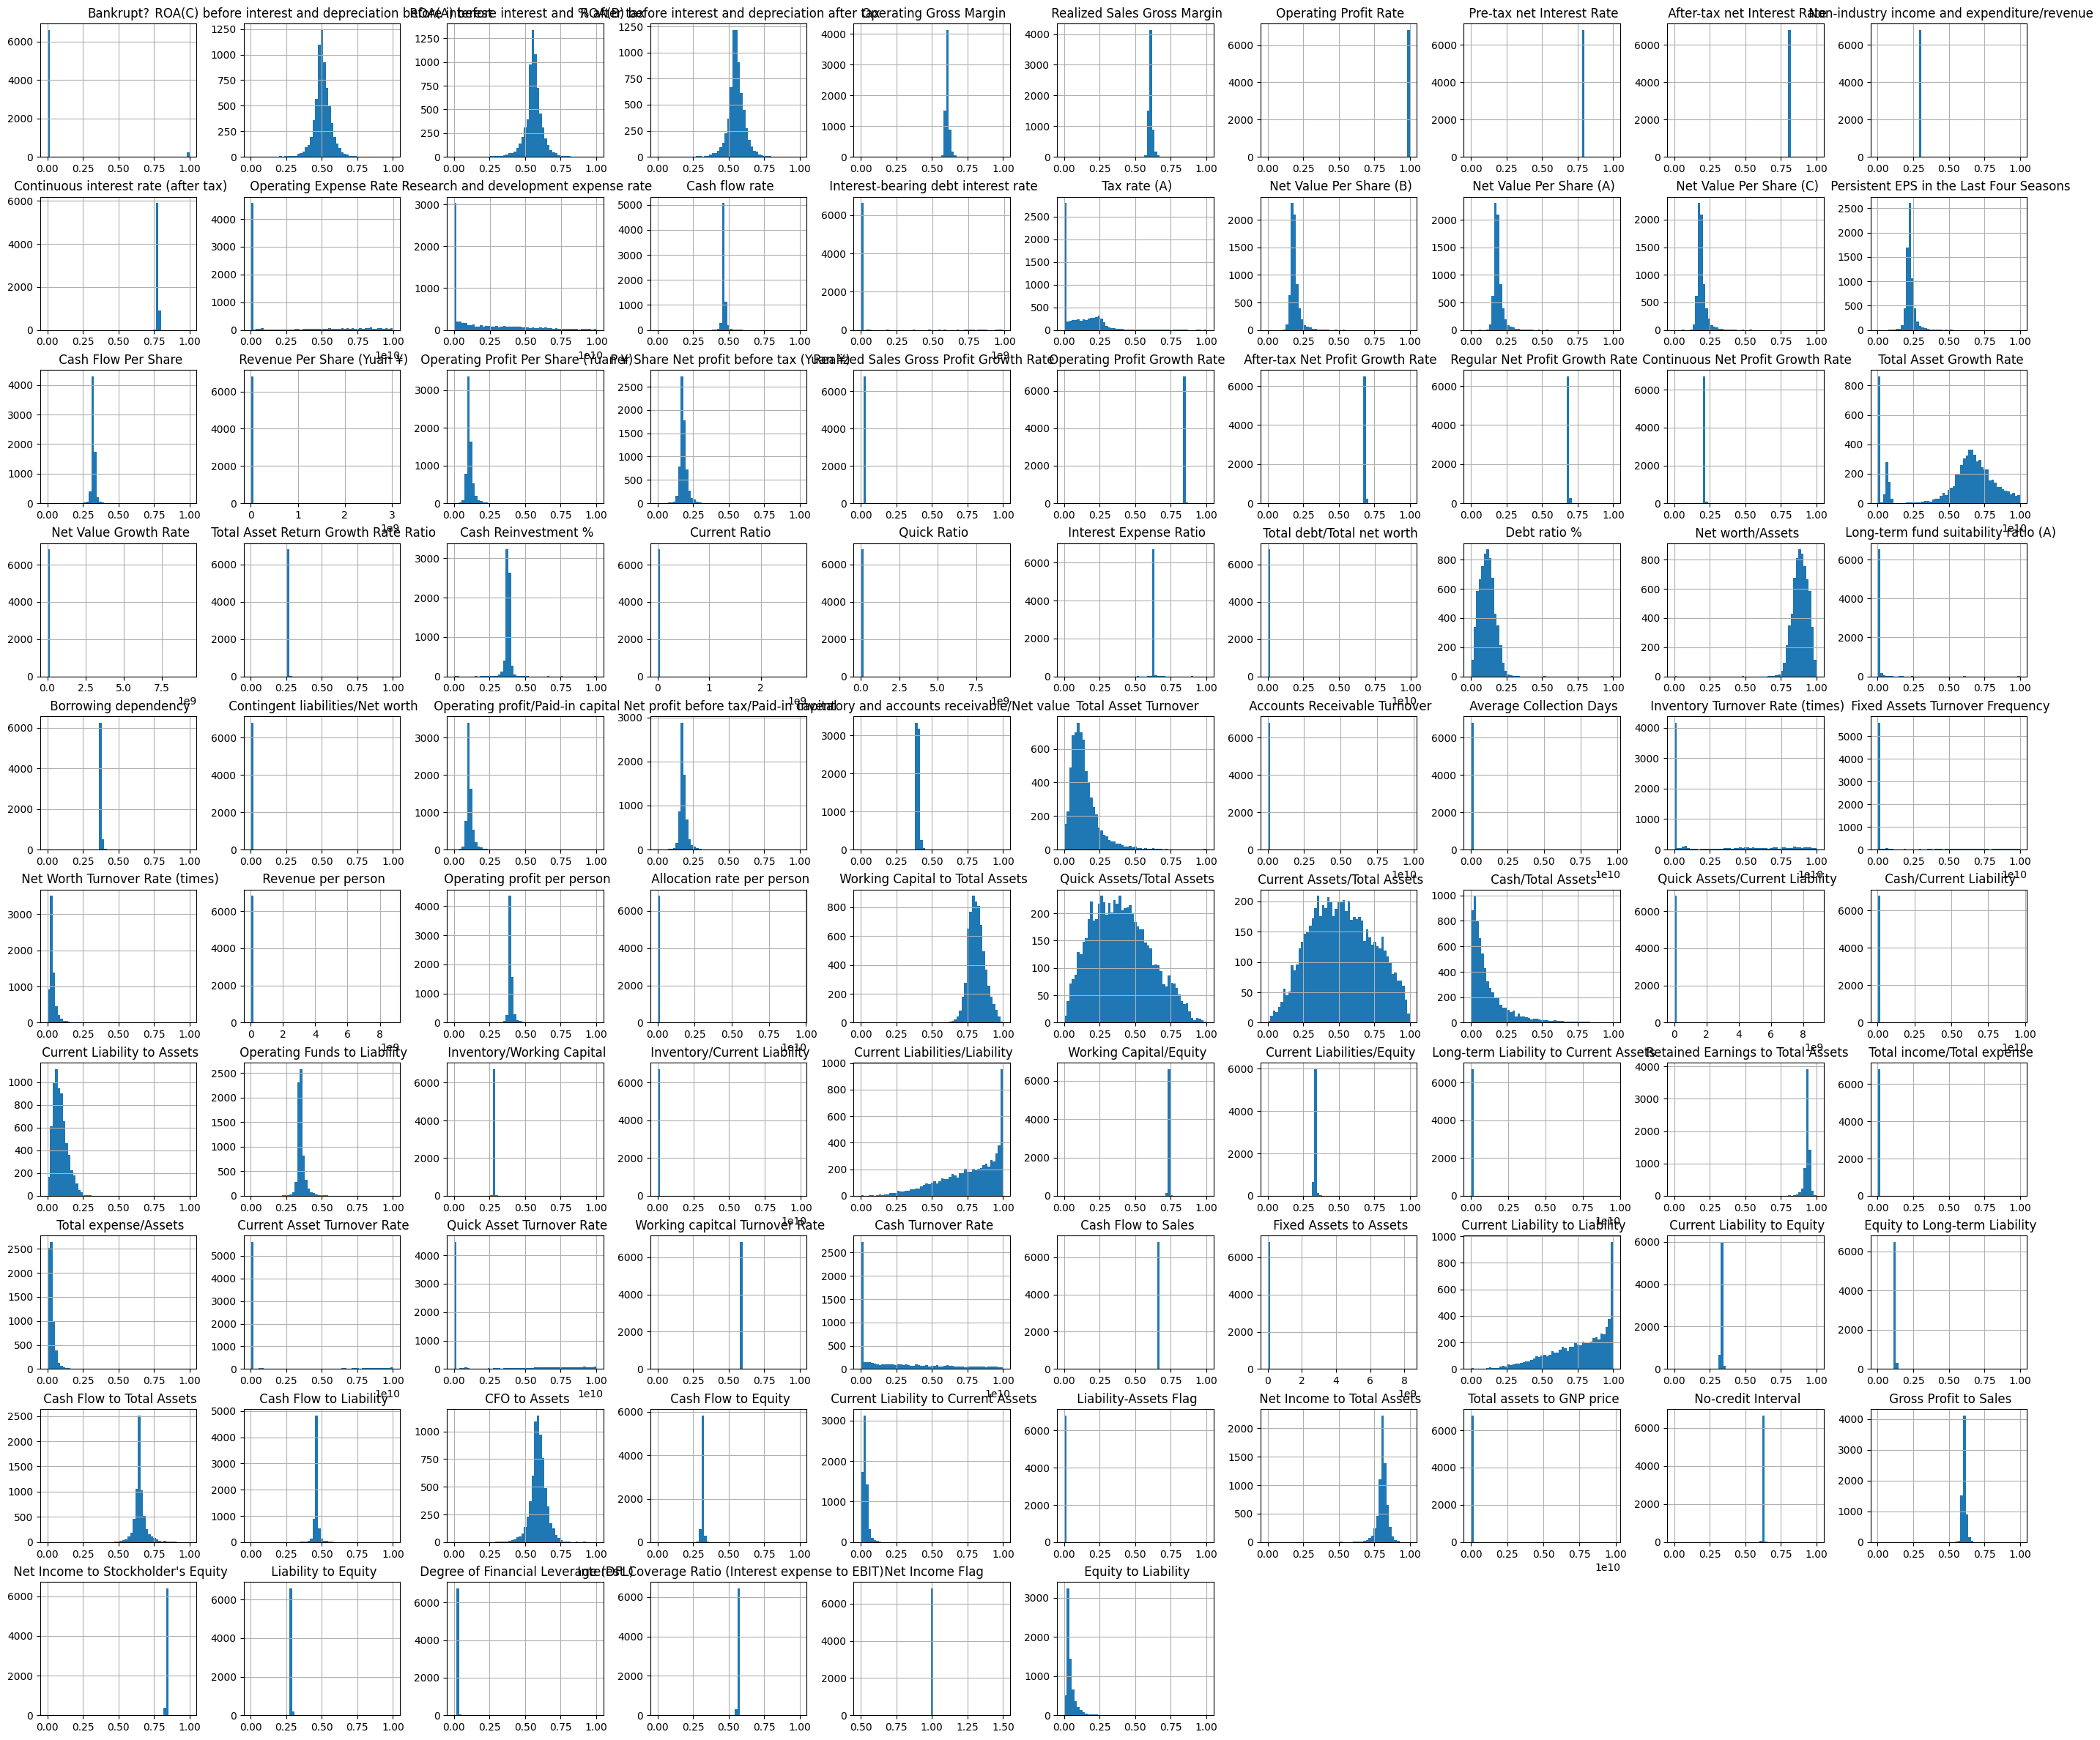

In [112]:
# Shows histograms for all columns in the dataset
data.hist(figsize = (35,30), bins = 55)
plt.show()

In [113]:
# Separates the training and testing data and stratifies the split based on the Bankrupt? column
# This ensures that the training and testing sets have the same proportion of bankrupt and non-bankrupt companies
def split_data(data):
    """
    Split the data into a training and testing set
    """
    return train_test_split(data, test_size=0.1, random_state=42, stratify=data['Bankrupt?'])

train_set, test_set = split_data(data)


In [114]:
# Saves the training and testing sets to parquet files to be used later
train_set.to_parquet('train_set.parquet')
test_set.to_parquet('test_set.parquet')

In [115]:
# Deletes the train_set and test_set variables to free up memory and reads the train_set from the parquet file
if 'train_set' in locals():
    data = train_set
    del train_set, test_set # to free up memory
else:
    data = pd.read_parquet('train_set.parquet')

## Explore the data

**1. Copy the data for exploration, downsampling to a manageable size if necessary.**
- placeholder

**2. Study each attribute and its characteristics: Name; Type (categorical, numerical,bounded, text, structured, ...); % of missing values;Noisiness and type of noise (stochastic, outliers, rounding errors, ...);Usefulness for the task; Type of distribution (Gaussian, uniform,logarithmic, ...)**
- placeholder


**3. For supervised learning tasks, identify the target attribute(s)**
- placeholder


**4. Visualize the data**
- placeholder


**5. Study the correlations between attributes**
- placeholder


**6. Study how you would solve the problem manually** 
- placeholder


**7. Identify the promising transformations you may want to apply**
- placeholder


**8. Identify extra data that would be useful (go back to “Get the Data”)**
- placeholder


**9. Document what you have learned**
- placeholder



## Data Visualization

| Variable                                                | Definition                                             | Type             | Missing | Noise | Usefulness      | Distribution |
| ------------------------------------------------------- | ------------------------------------------------------ | ---------------- | ------- | ----- | --------------- | ------------ |
| Bankrupt?                                               | Target label                                            | Binary (float64) | 0       | None  | Target variable | Categorical  |
| ROA(C) before interest and depreciation before interest | Return On Total Assets(C)                              | float64          | 0       | None  | High            | Normal       |
| ROA(A) before interest and % after tax                  | Return On Total Assets(A)                              | float64          | 0       | None  | High            | Normal       |
| ROA(B) before interest and depreciation after tax       | Return On Total Assets(B)                              | float64          | 0       | None  | High            | Normal       |
| Operating Gross Margin                                  | Gross Profit/Net Sales                                 | float64          | 0       | None  | High            | Skewed Left  |
| Realized Sales Gross Margin                             | Realized Gross Profit/Net Sales                        | float64          | 0       | None  | Medium          | Skewed Left  |
| Operating Profit Rate                                   | Operating Income/Net Sales                             | float64          | 0       | None  | High            | Normal       |
| Pre-tax net Interest Rate                               | Pre-Tax Income/Net Sales                               | float64          | 0       | None  | Medium          | Normal       |
| After-tax net Interest Rate                             | Net Income/Net Sales                                   | float64          | 0       | None  | High            | Normal       |
| Non-industry income and expenditure/revenue             | Net Non-operating Income Ratio                         | float64          | 0       | None  | Low             | Normal       |
| Continuous interest rate (after tax)                    | Net Income-Exclude Disposal Gain or Loss/Net Sales     | float64          | 0       | None  | Medium          | Normal       |
| Operating Expense Rate                                  | Operating Expenses/Net Sales                           | float64          | 0       | None  | High            | Skewed       |
| Research and development expense rate                   | (Research and Development Expenses)/Net Sales          | float64          | 0       | None  | Low             | Skewed Right |
| Cash flow rate                                          | Cash Flow from Operating/Current Liabilities           | float64          | 0       | None  | High            | Normal       |
| Interest-bearing debt interest rate                     | Interest-bearing Debt/Equity                           | float64          | 0       | None  | High            | Normal       |
| Tax rate (A)                                            | Effective Tax Rate                                     | float64          | 0       | None  | Low             | Skewed Right |
| Net Value Per Share (B)                                 | Book Value Per Share(B)                                | float64          | 0       | None  | Medium          | Skewed Right |
| Net Value Per Share (A)                                 | Book Value Per Share(A)                                | float64          | 0       | None  | Medium          | Skewed Right |
| Net Value Per Share (C)                                 | Book Value Per Share(C)                                | float64          | 0       | None  | Medium          | Skewed Right |
| Persistent EPS in the Last Four Seasons:                | EPS-Net Income                                         | float64          | 0       | None  | High            | Normal       |
| Cash Flow Per Share                                     | Cash Flow Per Share                                    | float64          | 0       | None  | High            | Normal       |
| Revenue Per Share (Yuan ¥)                              | Sales Per Share                                        | float64          | 0       | None  | Medium          | Normal       |
| Operating Profit Per Share (Yuan ¥)                     | Operating Income Per Share                             | float64          | 0       | None  | High            | Normal       |
| Per Share Net profit before tax (Yuan ¥)                | Pretax Income Per Share                                | float64          | 0       | None  | High            | Normal       |
| Realized Sales Gross Profit Growth Rate                 | Realized Sales Gross Profit Growth Rate                | float64          | 0       | None  | Medium          | Normal       |
| Operating Profit Growth Rate                            | Operating Income Growth                                | float64          | 0       | None  | High            | Normal       |
| After-tax Net Profit Growth Rate                        | Net Income Growth                                      | float64          | 0       | None  | High            | Normal       |
| Regular Net Profit Growth Rate                          | Continuing Operating Income after Tax Growth           | float64          | 0       | None  | High            | Normal       |
| Continuous Net Profit Growth Rate                       | Net Income-Excluding Disposal Gain or Loss Growth      | float64          | 0       | None  | High            | Normal       |
| Total Asset Growth Rate                                 | Total Asset Growth                                     | float64          | 0       | None  | Medium          | Normal       |
| Net Value Growth Rate                                   | Total Equity Growth                                    | float64          | 0       | None  | Medium          | Normal       |
| Total Asset Return Growth Rate Ratio:                   | Return on Total Asset Growth                           | float64          | 0       | None  | High            | Normal       |
| Cash Reinvestment %                                     | Cash Reinvestment Ratio                                | float64          | 0       | None  | Medium          | Normal       |
| Current Ratio                                           | Current Ratio                                          | float64          | 0       | None  | High            | Normal       |
| Quick Ratio                                             | Acid Test                                              | float64          | 0       | None  | High            | Normal       |
| Interest Expense Ratio                                  | Interest Expenses/Total Revenue                        | float64          | 0       | None  | High            | Normal       |
| Total debt/Total net worth                              | Total Liability/Equity Ratio                           | float64          | 0       | None  | High            | Normal       |
| Debt ratio %                                            | Liability/Total Assets                                 | float64          | 0       | None  | High            | Normal       |
| Net worth/Assets                                        | Equity/Total Assets                                    | float64          | 0       | None  | High            | Normal       |
| Long-term fund suitability ratio (A)                    | (Long-term Liability+Equity)/Fixed Assets              | float64          | 0       | None  | Medium          | Normal       |
| Borrowing dependency                                    | Cost of Interest-bearing Debt                          | float64          | 0       | None  | High            | Normal       |
| Contingent liabilities/Net worth                        | Contingent Liability/Equity                            | float64          | 0       | None  | Medium          | Normal       |
| Operating profit/Paid-in capital                        | Operating Income/Capital                               | float64          | 0       | None  | High            | Normal       |
| Net profit before tax/Paid-in capital                   | Pretax Income/Capital                                  | float64          | 0       | None  | High            | Skewed Right |
| Inventory and accounts receivable/Net value             | (Inventory+Accounts Receivables)/Equity                | float64          | 0       | None  | Medium          | Normal       |
| Total Asset Turnover                                    | Total Asset Turnover                                   | float64          | 0       | None  | High            | Skewed Right |
| Accounts Receivable Turnover                            | Accounts Receivable Turnover                           | float64          | 0       | None  | Medium          | Normal       |
| Average Collection Days                                 | Days Receivable Outstanding                            | float64          | 0       | None  | Medium          | Normal       |
| Inventory Turnover Rate (times)                         | Inventory Turnover Rate (times)                        | float64          | 0       | None  | Medium          | Skewed Right |
| Fixed Assets Turnover Frequency                         | Fixed Assets Turnover Frequency                        | float64          | 0       | None  | Medium          | Skewed Right |
| Net Worth Turnover Rate (times)                         | Equity Turnover                                        | float64          | 0       | None  | Medium          | Normal       |
| Revenue per person                                      | Sales Per Employee                                     | float64          | 0       | None  | Low             | Normal       |
| Operating profit per person                             | Operation Income Per Employee                          | float64          | 0       | None  | Low             | Skewed Right |
| Allocation rate per person                              | Fixed Assets Per Employee                              | float64          | 0       | None  | Low             | Normal       |
| Working Capital to Total Assets                         | Working Capital to Total Assets                        | float64          | 0       | None  | High            | Normal       |
| Quick Assets/Total Assets                               | Quick Assets/Total Assets                              | float64          | 0       | None  | Medium          | Normal       |
| Current Assets/Total Assets                             | Current Assets/Total Assets                            | float64          | 0       | None  | Medium          | Normal       |
| Cash/Total Assets                                       | Cash/Total Assets                                      | float64          | 0       | None  | High            | Skewed Right |
| Quick Assets/Current Liability                          | Quick Assets/Current Liability                         | float64          | 0       | None  | High            | Normal       |
| Cash/Current Liability                                  | Cash/Current Liability                                 | float64          | 0       | None  | High            | Normal       |
| Current Liability to Assets                             | Current Liability to Assets                            | float64          | 0       | None  | High            | Skewed Right |
| Operating Funds to Liability                            | Operating Funds to Liability                           | float64          | 0       | None  | High            | Normal       |
| Inventory/Working Capital                               | Inventory/Working Capital                              | float64          | 0       | None  | Medium          | Normal       |
| Inventory/Current Liability                             | Inventory/Current Liability                            | float64          | 0       | None  | Medium          | Normal       |
| Current Liabilities/Liability                           | Current Liabilities/Liability                          | float64          | 0       | None  | Medium          | Skewed Left  |
| Working Capital/Equity                                  | Working Capital/Equity                                 | float64          | 0       | None  | Medium          | Normal       |
| Current Liabilities/Equity                              | Current Liabilities/Equity                             | float64          | 0       | None  | High            | Normal       |
| Long-term Liability to Current Assets                   | Long-term Liability to Current Assets                  | float64          | 0       | None  | Medium          | Normal       |
| Retained Earnings to Total Assets                       | Retained Earnings to Total Assets                      | float64          | 0       | None  | High            | Skewed Left  |
| Total income/Total expense                              | Total income/Total expense                             | float64          | 0       | None  | High            | Normal       |
| Total expense/Assets                                    | Total expense/Assets                                   | float64          | 0       | None  | High            | Skewed Right |
| Current Asset Turnover Rate                             | Current Assets to Sales                                | float64          | 0       | None  | Medium          | Skewed Right |
| Quick Asset Turnover Rate                               | Quick Assets to Sales                                  | float64          | 0       | None  | Medium          | Skewed Right |
| Working Capital Turnover Rate                           | Working Capital to Sales                               | float64          | 0       | None  | Medium          | Normal       |
| Cash Turnover Rate                                      | Cash to Sales                                          | float64          | 0       | None  | Medium          | Skewed Right |
| Cash Flow to Sales                                      | Cash Flow to Sales                                     | float64          | 0       | None  | High            | Normal       |
| Fixed Assets to Assets                                  | Fixed Assets to Assets                                 | float64          | 0       | None  | Low             | Normal       |
| Current Liability to Liability                          | Current Liability to Liability                         | float64          | 0       | None  | Medium          | Skewed Left  |
| Current Liability to Equity                             | Current Liability to Equity                            | float64          | 0       | None  | High            | Normal       |
| Equity to Long-term Liability                           | Equity to Long-term Liability                          | float64          | 0       | None  | Medium          | Normal       |
| Cash Flow to Total Assets                               | Cash Flow to Total Assets                              | float64          | 0       | None  | High            | Normal       |
| Cash Flow to Liability                                  | Cash Flow to Liability                                 | float64          | 0       | None  | High            | Normal       |
| CFO to Assets                                           | CFO to Assets                                          | float64          | 0       | None  | High            | Normal       |
| Cash Flow to Equity                                     | Cash Flow to Equity                                    | float64          | 0       | None  | High            | Normal       |
| Current Liability to Current Assets                     | Current Liability to Current Assets                    | float64          | 0       | None  | High            | Normal       |
| Liability-Assets Flag                                   | 1 if Total Liability exceeds Total Assets, 0 otherwise | Binary (float64) | 0       | None  | High            | Categorical  |
| Net Income to Total Assets                              | Net Income to Total Assets                             | float64          | 0       | None  | High            | Skewed Left  |
| Total assets to GNP price                               | Total assets to GNP price                              | float64          | 0       | None  | Low             | Normal       |
| No-credit Interval                                      | No-credit Interval                                     | float64          | 0       | None  | Medium          | Normal       |
| Gross Profit to Sales                                   | Gross Profit to Sales                                  | float64          | 0       | None  | High            | Skewed Left  |
| Net Income to Stockholder's Equity                      | Net Income to Stockholder's Equity                     | float64          | 0       | None  | High            | Normal       |
| Liability to Equity                                     | Liability to Equity                                    | float64          | 0       | None  | High            | Normal       |
| Degree of Financial Leverage (DFL)                      | Degree of Financial Leverage (DFL)                     | float64          | 0       | None  | High            | Normal       |
| Interest Coverage Ratio                                 | Interest expense to EBIT                               | float64          | 0       | None  | High            | Normal       |
| Net Income Flag                                         | 1 if Net Income is Negative for the last two years     | Binary (float64) | 0       | None  | High            | Categorical  |
| Equity to Liability                                     | Equity to Liability                                    | float64          | 0       | None  | High            | Skewed Right |


In [116]:
# Show the values of the correlation matrix for the features and the target variable Bankrupt?
target_correlation = data.corr()['Bankrupt?'].sort_values(ascending=False)
print(target_correlation)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.249448
 Current Liability to Assets                                0.190205
 Borrowing dependency                                       0.177453
 Liability to Equity                                        0.167790
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.268327
 ROA(B) before interest and depreciation after tax         -0.280655
 ROA(A) before interest and % after tax                    -0.288803
 Net Income to Total Assets                                -0.323437
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64


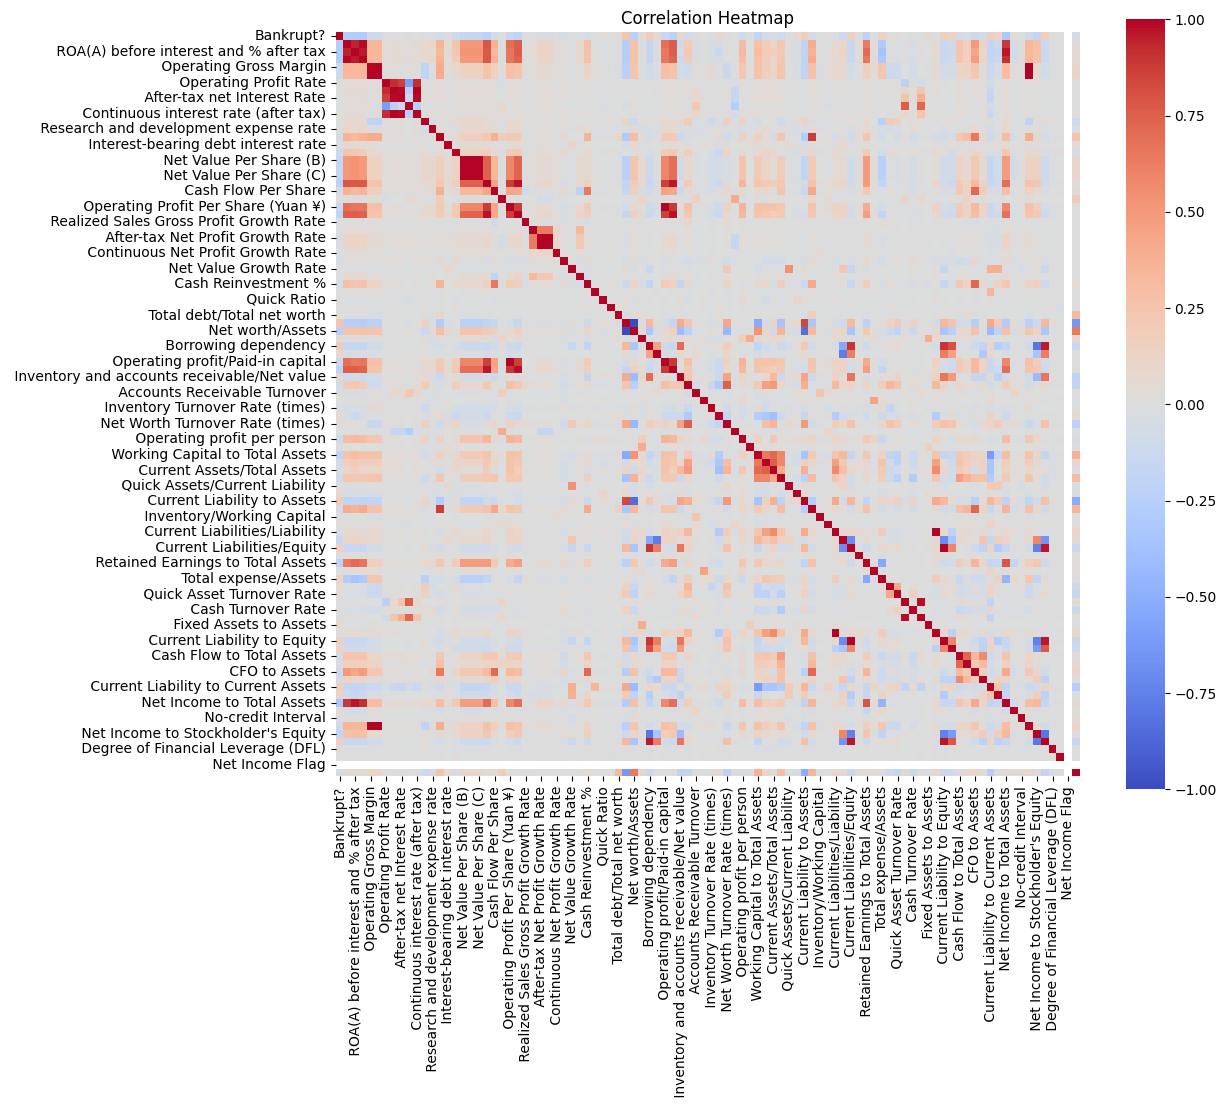

In [117]:
# Heating map of the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Bankrupt?', ylabel=' Net Income to Total Assets'>

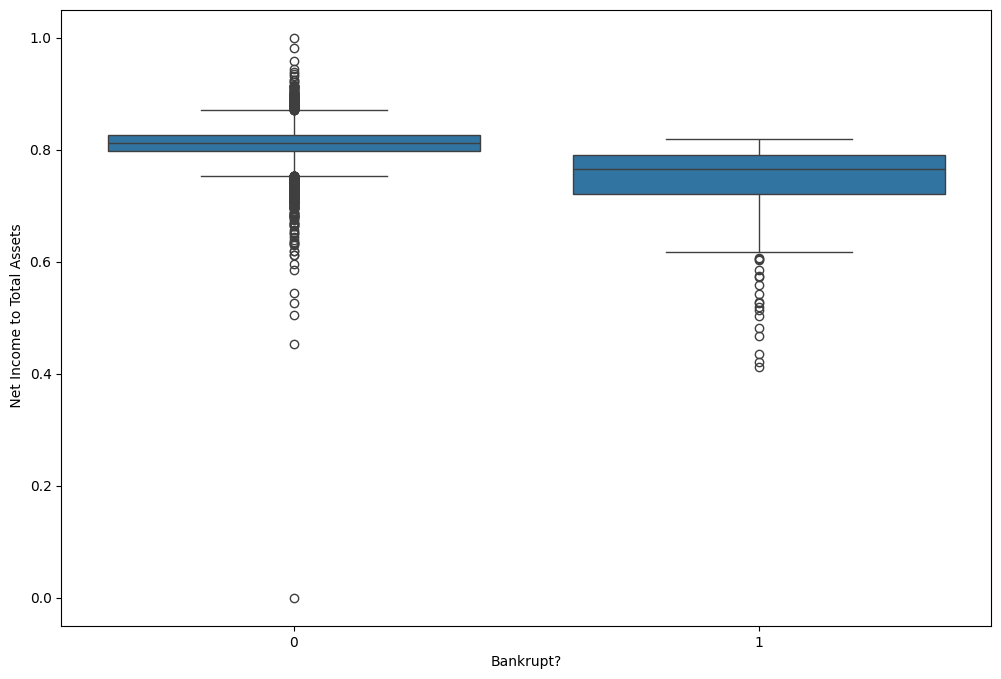

In [ ]:
# Boxplot of the Net Income to Total Assets feature against the Bankrupt? target variable
plt.figure(figsize=(10, 8))
sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=data)

<Axes: xlabel='Bankrupt?', ylabel=' Retained Earnings to Total Assets'>

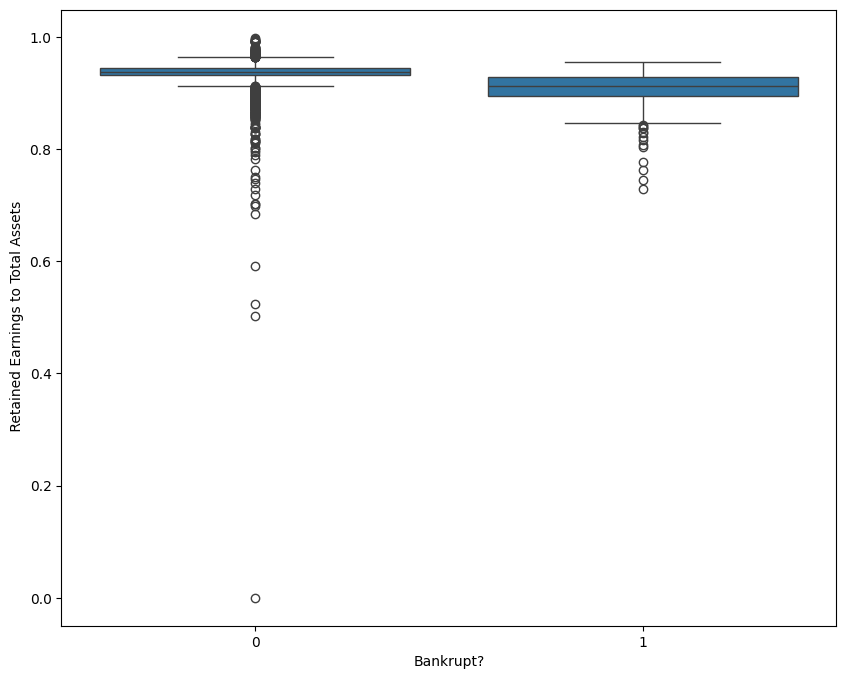

In [126]:
# Boxplot of the Retained Earnings to Total Assets feature against the Bankrupt? target variable
plt.figure(figsize=(10, 8))
sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=data)

<Axes: xlabel='Bankrupt?', ylabel=' Debt ratio %'>

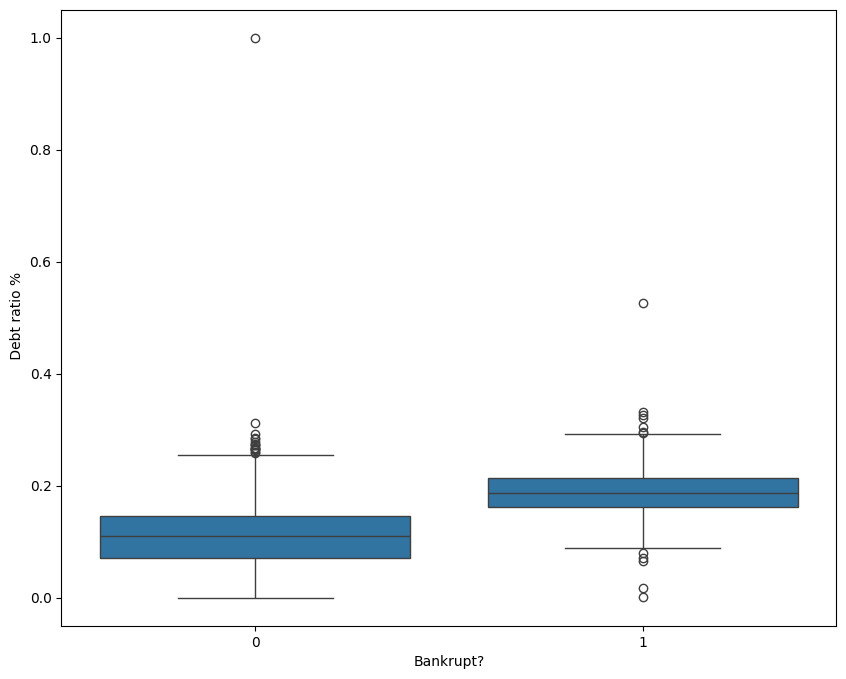

In [127]:
# Boxplot of the Total Debt to Total Assets feature against the Bankrupt? target variable
plt.figure(figsize=(10, 8))
sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=data)

In [ ]:
# Splitting the data into two sets: one for bankrupt companies and one for non-bankrupt companies
Not_Bankrupt_data = data[data["Bankrupt?"] == 0]
Bankrupt_data= data[data["Bankrupt?"] == 1]


(np.float64(0.937981172752017), np.float64(0.912923150852162))

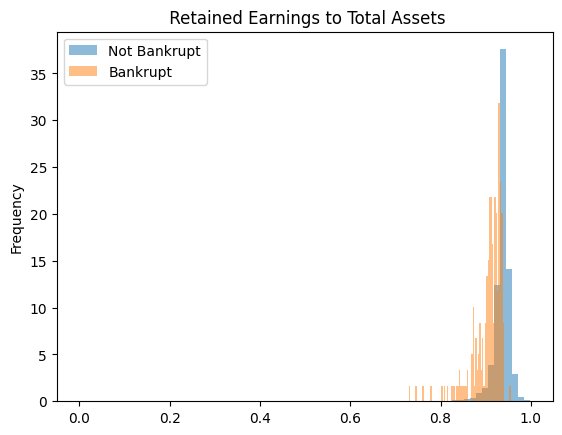

In [154]:
# Non-bankrupt companies tend to have a higher retained earning to total assets than bankrupt companies
# The median retained earnings to total assets for non-bankrupt companies is around 93% while bankrupt companies is around 91%
plt.title(" Retained Earnings to Total Assets")
Not_Bankrupt_data[" Retained Earnings to Total Assets"].plot(kind='hist', bins=75, alpha=0.5, density=True, label='Not Bankrupt')
Bankrupt_data[" Retained Earnings to Total Assets"].plot(kind='hist', bins=75, alpha=0.5, density=True, label='Bankrupt')
plt.legend()

Not_Bankrupt_data[" Retained Earnings to Total Assets"].median(), Bankrupt_data[" Retained Earnings to Total Assets"].median()

(np.float64(0.109562535901079), np.float64(0.187426308310911))

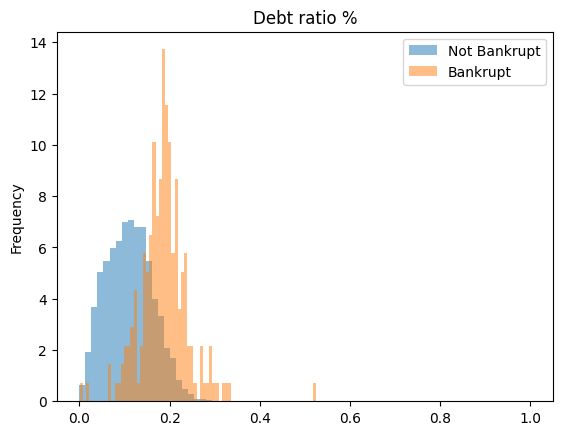

In [ ]:
# Non-bankrupt companies tend to have a lower debt ratio than bankrupt companies
# The median retained earnings to total assets for non-bankrupt companies is around 11% while bankrupt companies is around 19%
plt.title('Debt ratio %')
Not_Bankrupt_data[" Debt ratio %"].plot(kind='hist', bins=75, alpha=0.5, density=True, label='Not Bankrupt')
Bankrupt_data[" Debt ratio %"].plot(kind='hist', bins=75, alpha=0.5, density=True, label='Bankrupt')
plt.legend()

Not_Bankrupt_data[" Debt ratio %"].median(), Bankrupt_data[" Debt ratio %"].median()